In [ ]:
%pip install klib
%pip install plotly_express
%pip install missingno
%pip install dython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import klib
import plotly_express as px
import missingno as mogn
import warnings
from dash import Dash,dcc,html,Input,Output
from dython.nominal import associations
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder

In [15]:
#load the dataset
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [16]:
#see the first 5 rows
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
#the shape of data
train_df.shape

(891, 12)

In [19]:
#check the name of columns
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
#check the value of rows
for col in train_df.select_dtypes('object'):
    display(train_df[col].value_counts().to_frame().T)

Name,"Braund, Mr. Owen Harris","Boulos, Mr. Hanna","Frolicher-Stehli, Mr. Maxmillian","Gilinski, Mr. Eliezer","Murdlin, Mr. Joseph","Rintamaki, Mr. Matti","Stephenson, Mrs. Walter Bertram (Martha Eustis)","Elsbury, Mr. William James","Bourke, Miss. Mary","Chapman, Mr. John Henry",...,"Lewy, Mr. Ervin G","Hanna, Mr. Mansour","Allison, Miss. Helen Loraine","Saalfeld, Mr. Adolphe","Baxter, Mrs. James (Helene DeLaudeniere Chaput)","Kelly, Miss. Anna Katherine ""Annie Kate""","McCoy, Mr. Bernard","Johnson, Mr. William Cahoone Jr","Keane, Miss. Nora A","Dooley, Mr. Patrick"
count,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Sex,male,female
count,577,314


Ticket,347082,CA. 2343,1601,3101295,CA 2144,347088,S.O.C. 14879,382652,LINE,PC 17757,...,347470,349243,250651,A/5 2466,226593,9234,19988,2693,PC 17612,370376
count,7,7,7,6,6,6,5,5,4,4,...,1,1,1,1,1,1,1,1,1,1


Cabin,B96 B98,G6,C23 C25 C27,C22 C26,F33,F2,E101,D,C78,C93,...,C128,T,E40,C91,C32,E34,C7,C54,E36,C148
count,4,4,4,3,3,3,3,3,2,2,...,1,1,1,1,1,1,1,1,1,1


Embarked,S,C,Q
count,644,168,77


In [22]:
train_df.describe().style.background_gradient(cmap='copper')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train_df.describe(include='object').style.background_gradient(cmap='copper')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [24]:
def missing_value(train_df:pd.DataFrame):
    """function to print the missing value """
    missing_train_df=train_df.isnull().sum()
    total_record=train_df.shape[0]
    perc_missing=round((missing_train_df/total_record)*100,3)
    missing_train_df=pd.DataFrame(data={'columns_name':missing_train_df.index,
                                  'num_missing':missing_train_df.values,
                                  'perc_missing':perc_missing.values})

    return missing_train_df.sort_values(by='perc_missing',ascending=False)
missing_value(train_df)

,columns_name,num_missing,perc_missing
10,Cabin,687,77.104
5,Age,177,19.865
11,Embarked,2,0.224
0,PassengerId,0,0.000
1,Survived,0,0.000
2,Pclass,0,0.000
3,Name,0,0.000
4,Sex,0,0.000
6,SibSp,0,0.000
7,Parch,0,0.000


In [25]:
missing_value(test_df)

,columns_name,num_missing,perc_missing
9,Cabin,327,78.230
4,Age,86,20.574
8,Fare,1,0.239
0,PassengerId,0,0.000
1,Pclass,0,0.000
2,Name,0,0.000
3,Sex,0,0.000
5,SibSp,0,0.000
6,Parch,0,0.000
7,Ticket,0,0.000


GridSpec(6, 6)

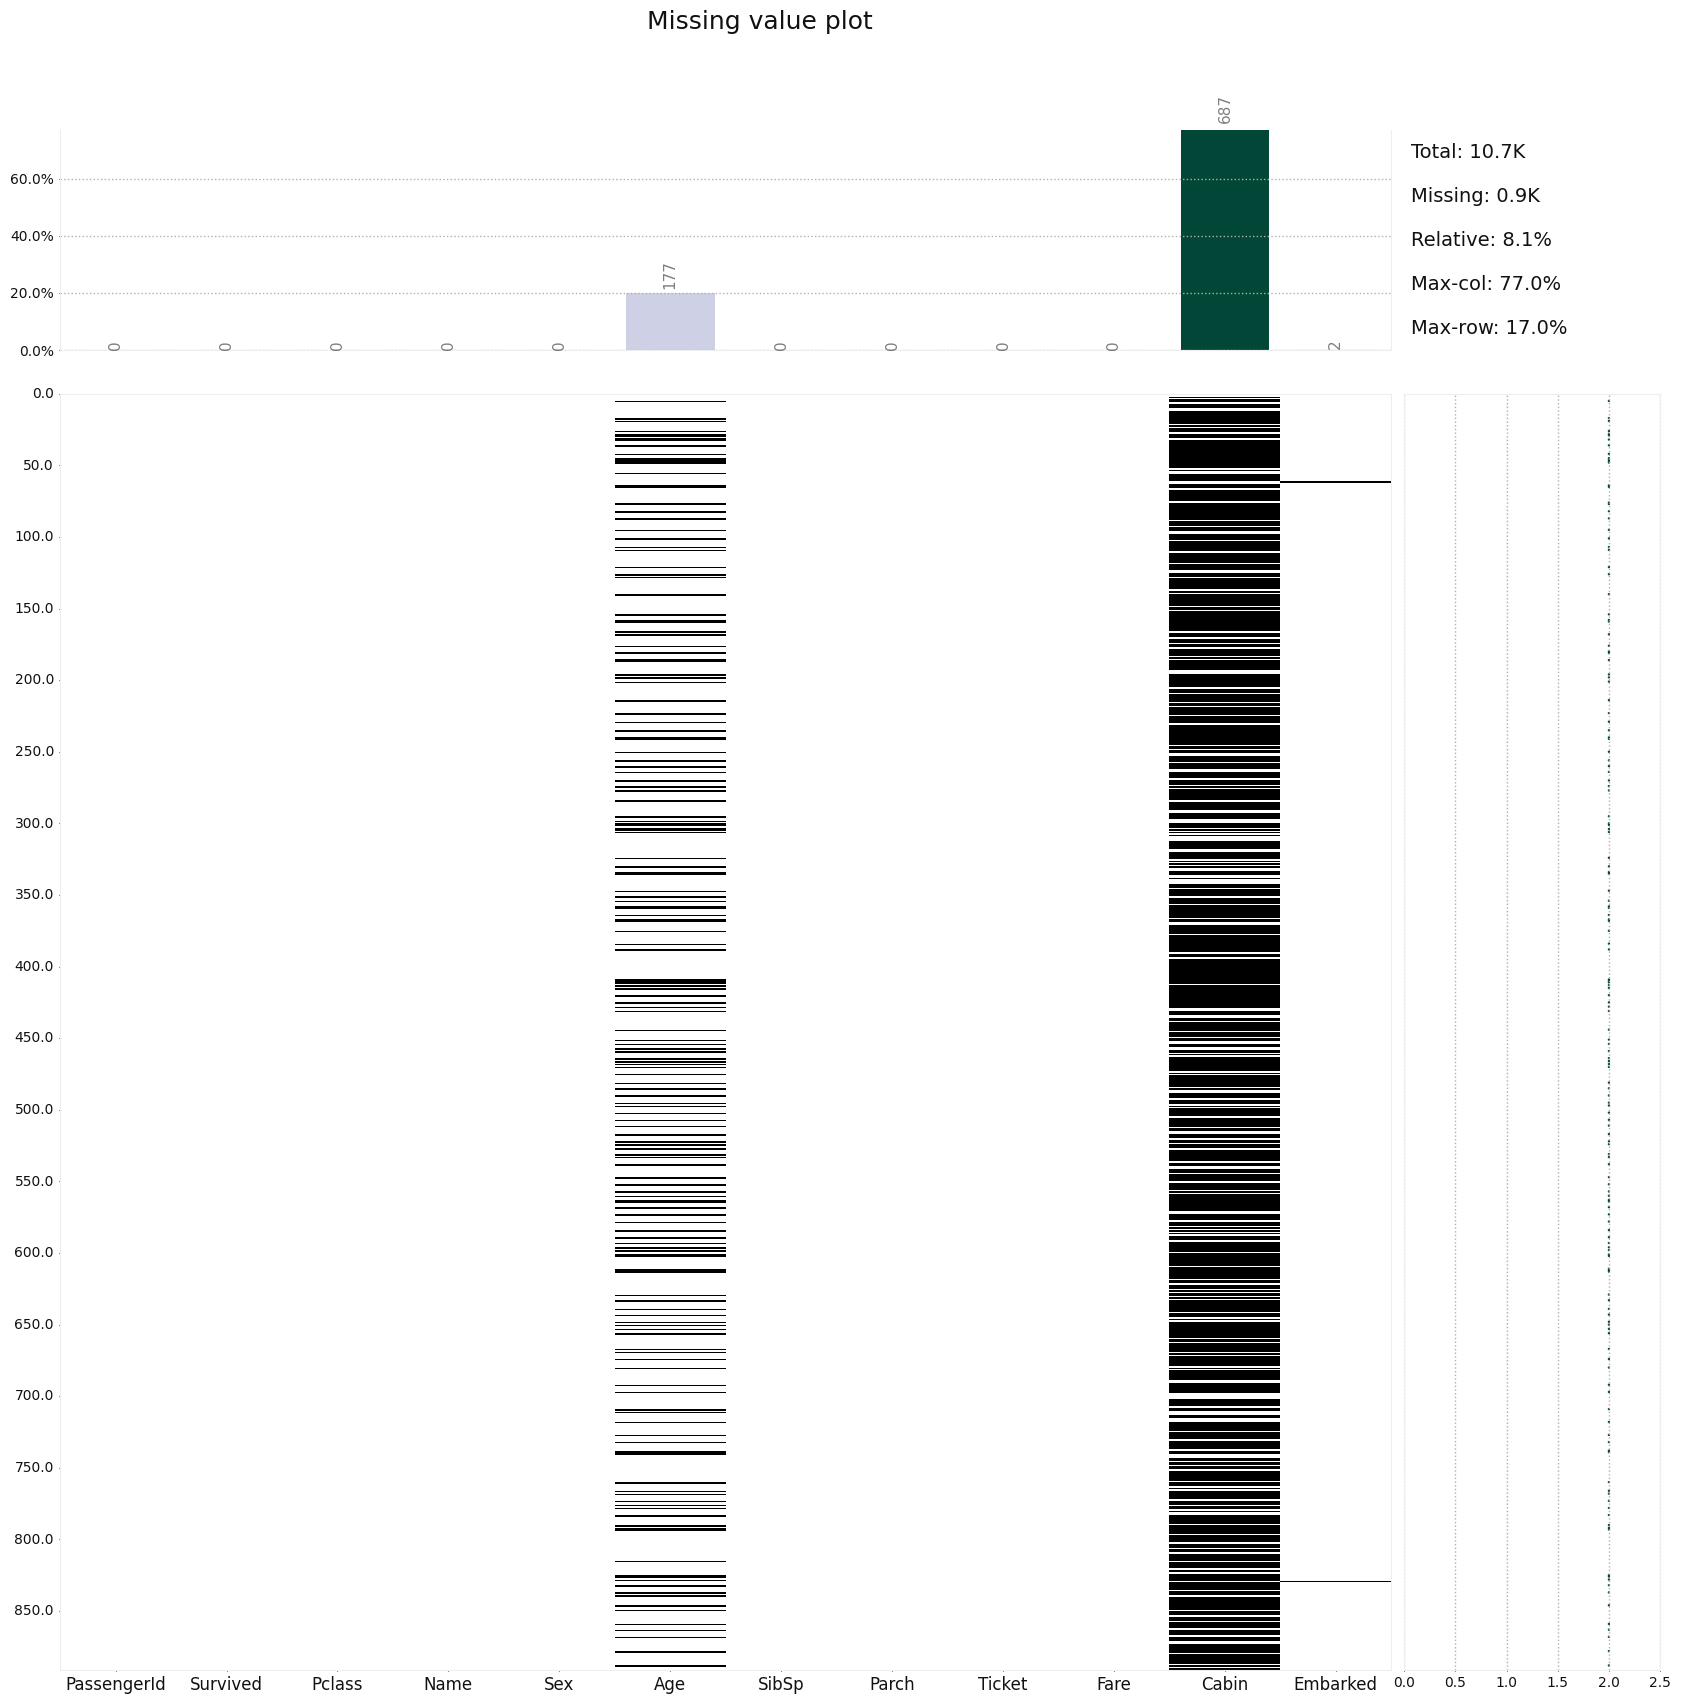

In [26]:
# to see the missing value and where there are gaps in data
klib.missingval_plot(train_df)

GridSpec(6, 6)

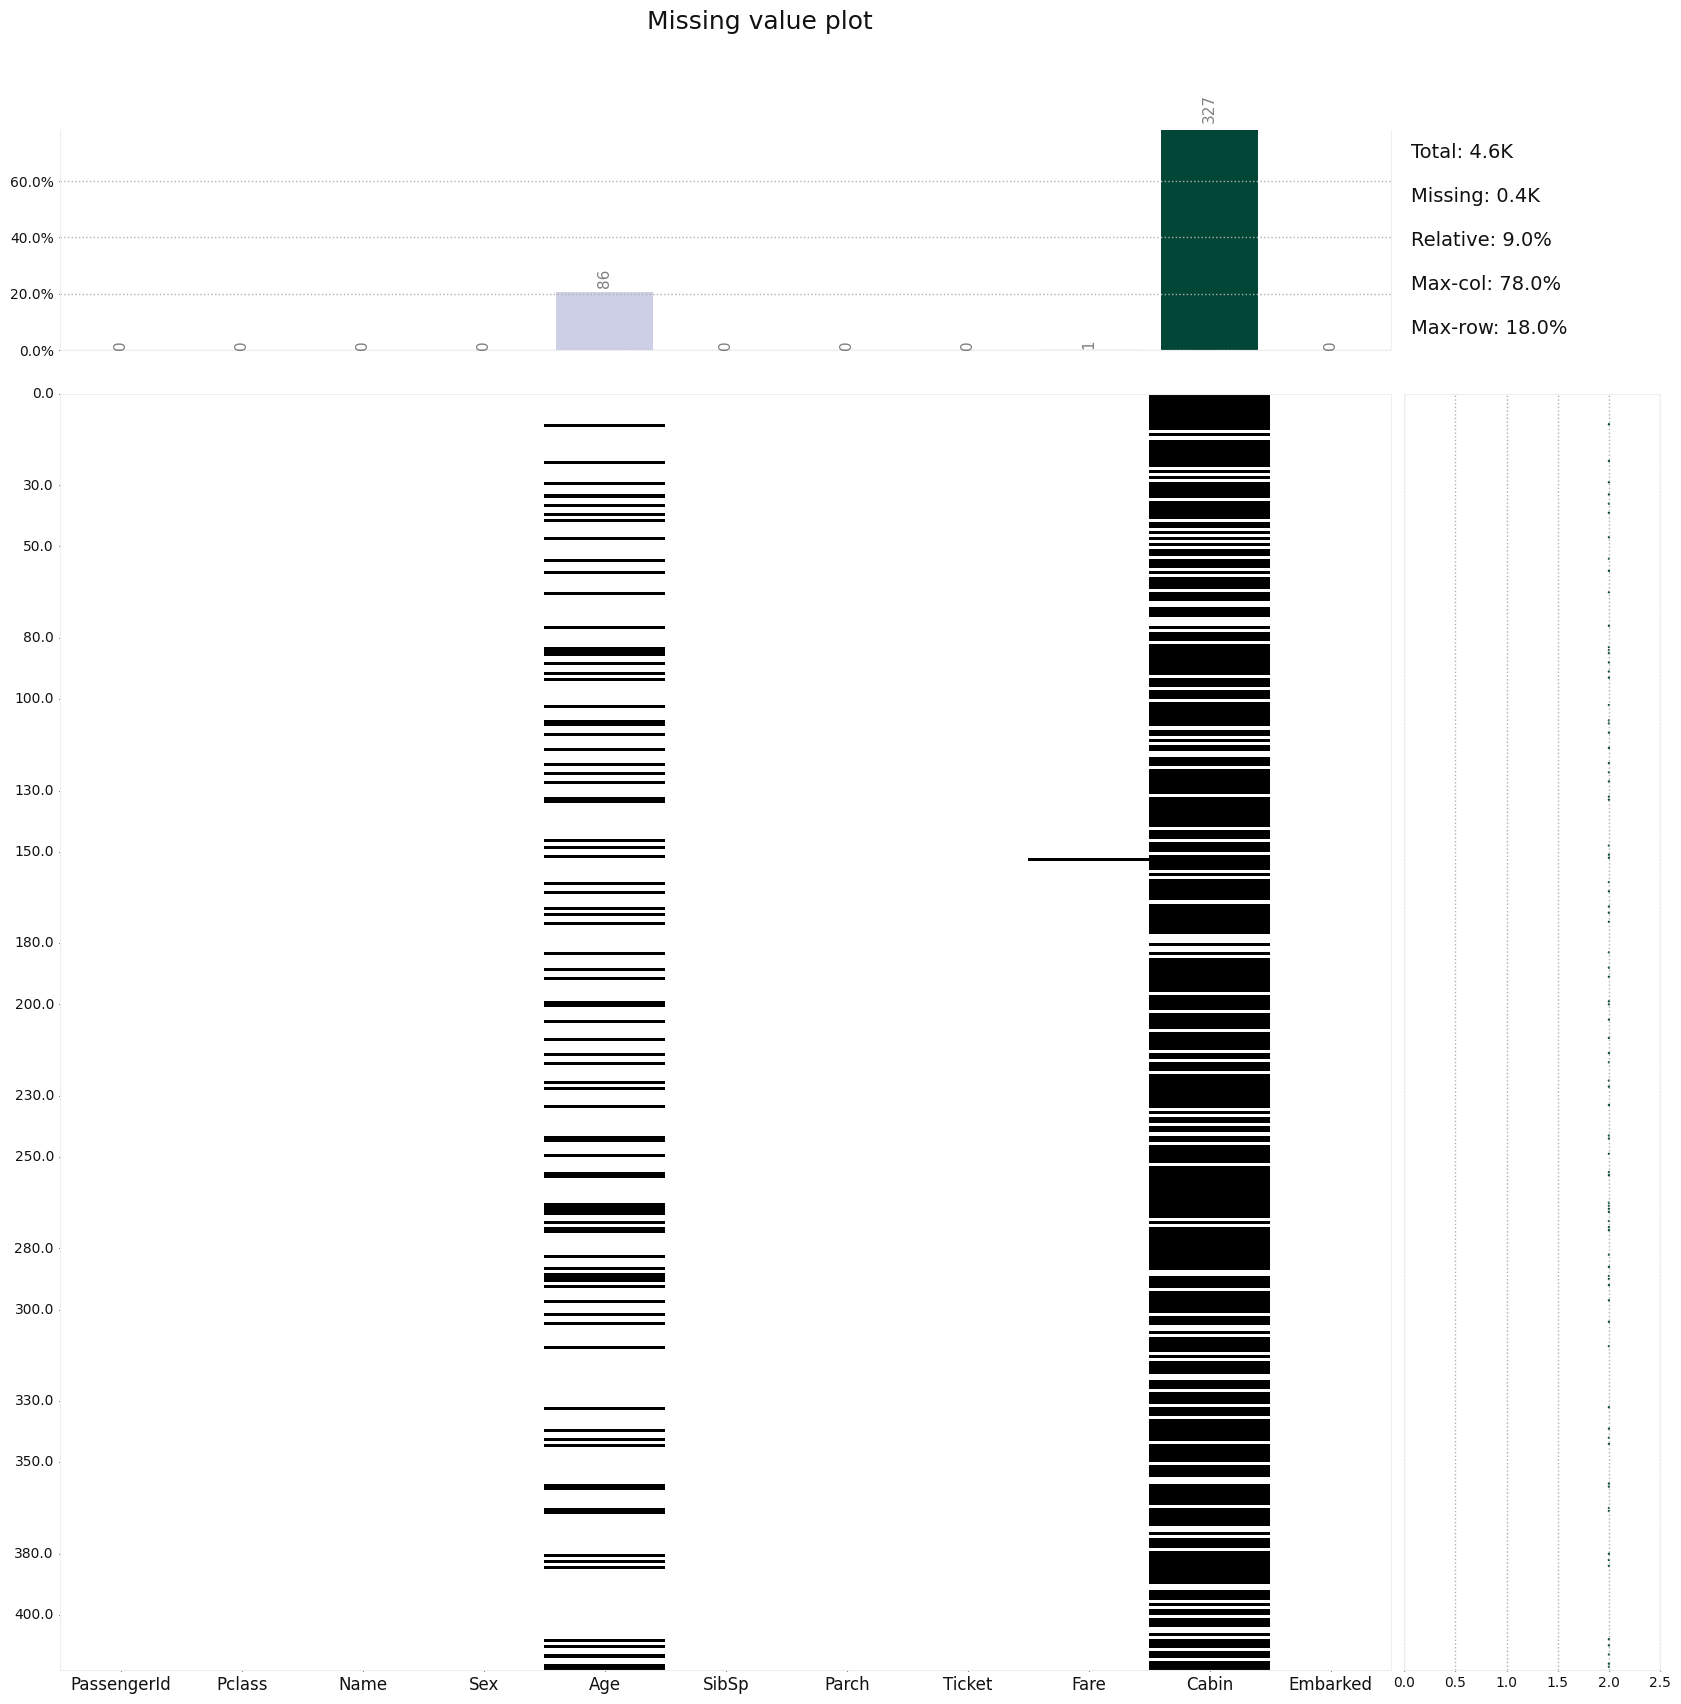

In [27]:
klib.missingval_plot(test_df)

<Axes: >

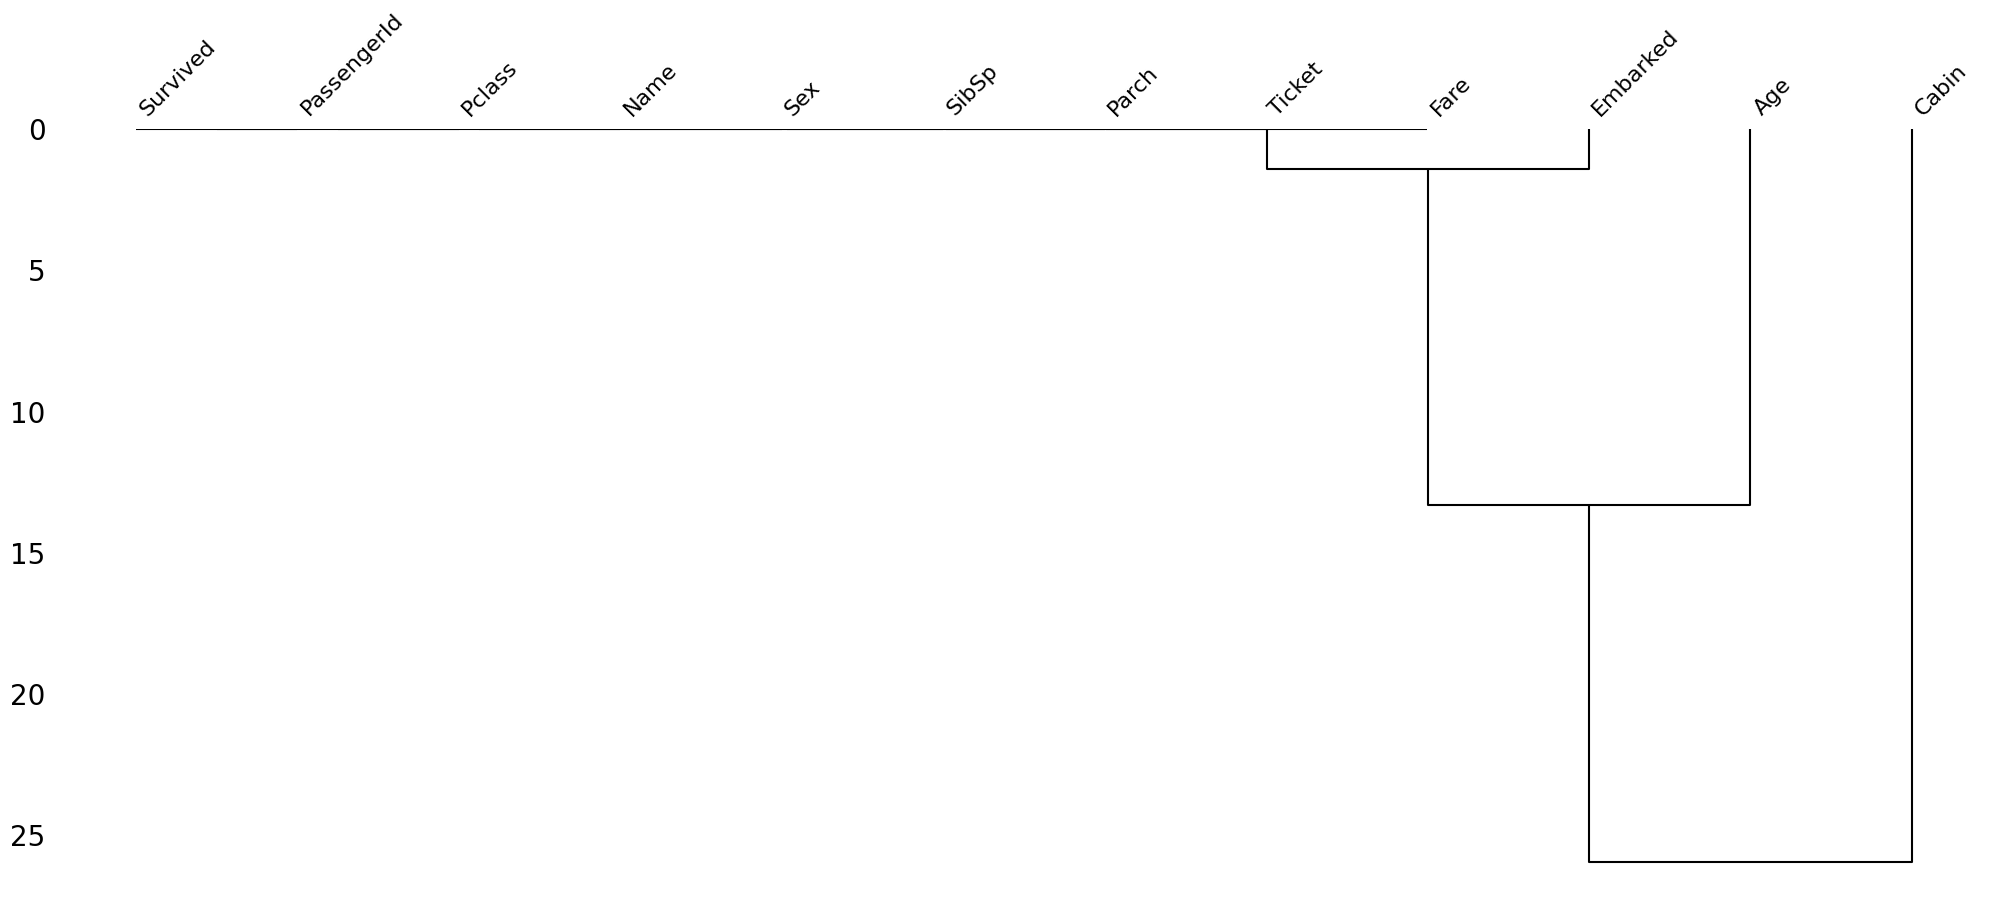

In [28]:
mogn.dendrogram(train_df)

<Axes: >

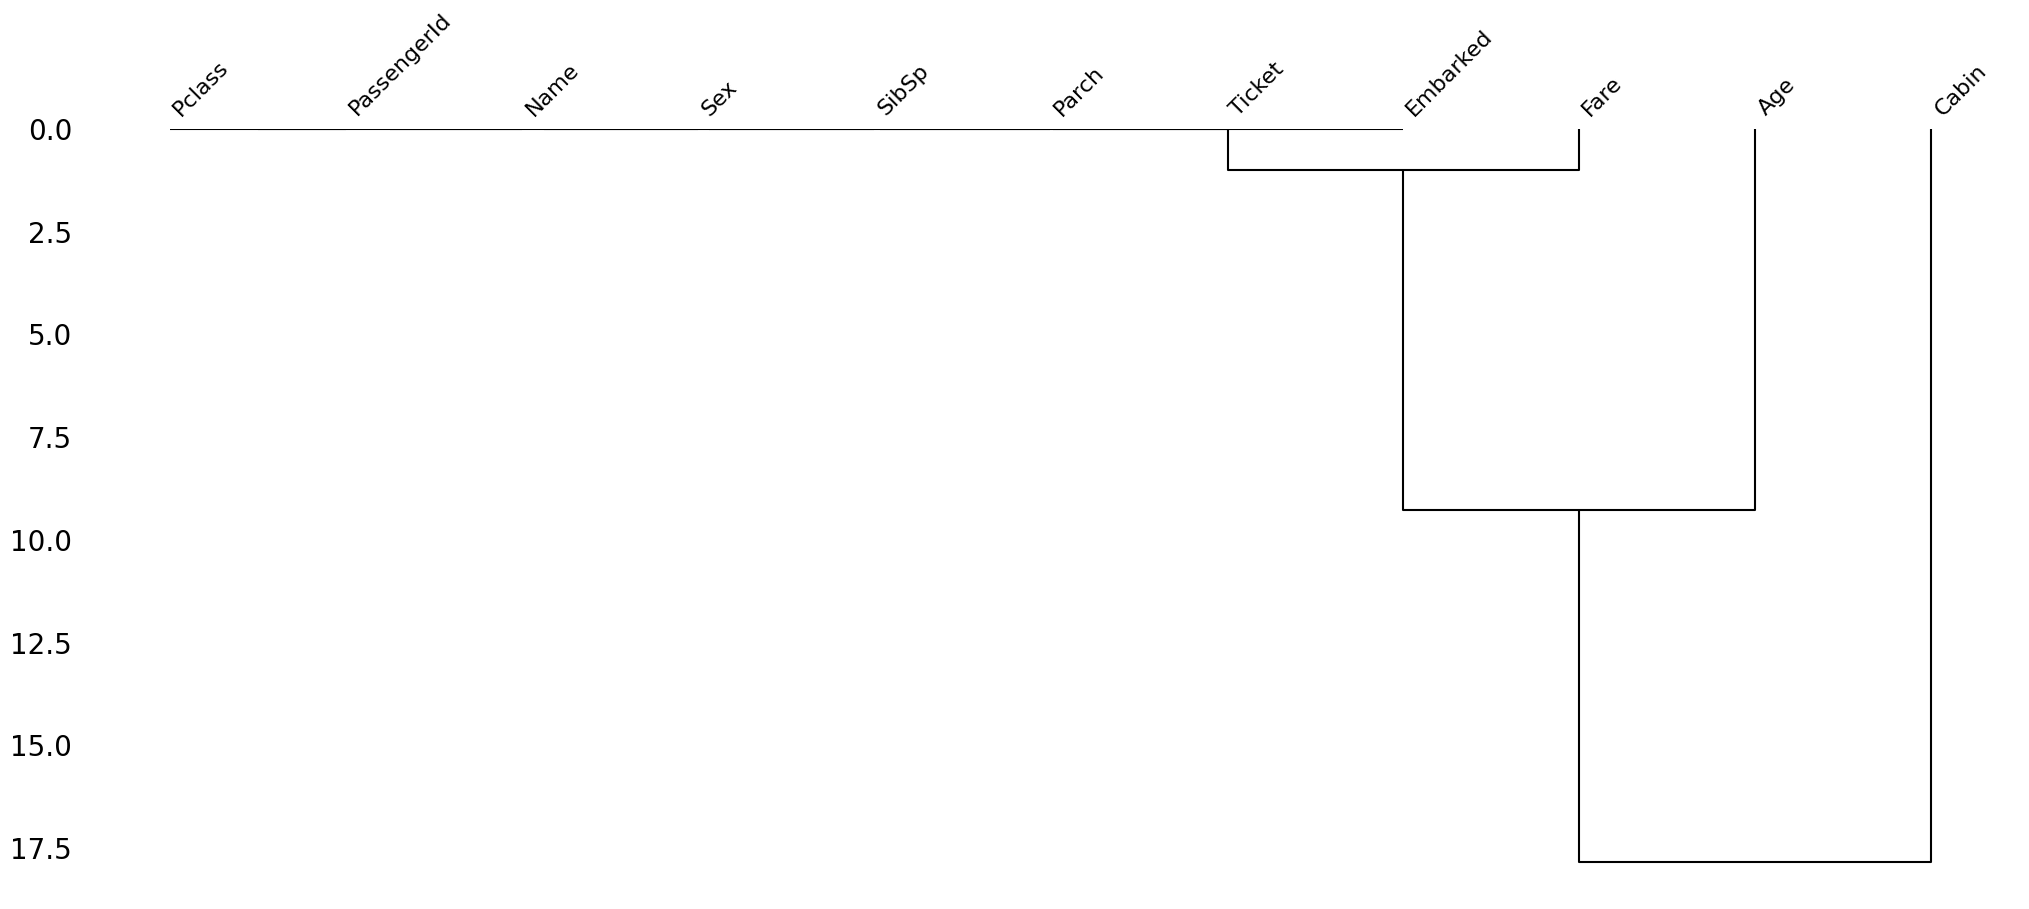

In [29]:
mogn.dendrogram(test_df)

In [30]:
# fixed the columns name
train_df.rename(columns={'PassengerId':'Passenger_id','SibSp':'Sib_Sp'},inplace=True)
test_df.rename(columns={'PassengerId':'Passenger_id','SibSp':'Sib_Sp'},inplace=True)
train_df.columns=train_df.columns.str.lower()
test_df.columns=test_df.columns.str.lower()

In [31]:
import re

# Define the deck level dictionary
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

# Create a list of datasets
data = [train_df, test_df]

for dataset in data:
    # Fill missing Cabin values with 'U0'
    dataset['cabin'] = dataset['cabin'].fillna("U0")

    # Extract the first sequence of letters which represents the deck and map it to a number
    dataset['deck'] = dataset['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck'] = dataset['deck'].map(deck)

    # Fill missing deck values with 0
    dataset['deck'] = dataset['deck'].fillna(0)

    # Convert deck to an integer type
    dataset['deck'] = dataset['deck'].astype(int)

    # Drop the Cabin column as it's no longer needed
    dataset.drop(['cabin'], axis=1, inplace=True)

<Axes: ylabel='Density'>

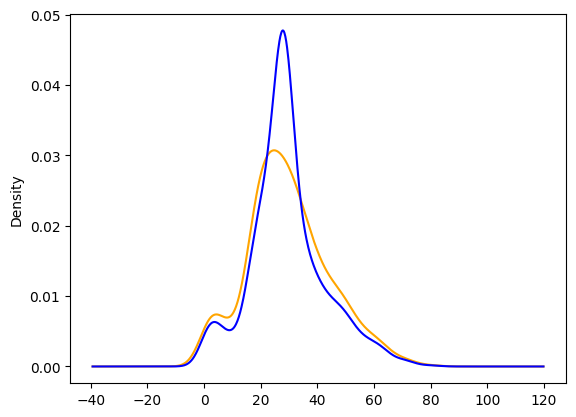

In [32]:
#first we will impute the missing value with median value

df_con=train_df.copy()

df_con.age.plot.kde(color='orange',label='age')
df_con.age.fillna(value=df_con.age.median()).plot.kde(color='blue',label='age_fillna')

In [33]:
round(df_con.age.std(),2),round((df_con.age.fillna(value=df_con.age.median())).std(),2)

(14.53, 13.02)

In [35]:
#First we will used KNNImputer
%pip install feature_engine
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,SimpleImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import IterativeImputer

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/344.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/344.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/344.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/344.3 kB ? eta -:--:--
   ------ -------------------------------- 61.4/344.3 kB 363.1 kB/s eta 0:00:01
   ------ -------------------------------- 61.4/344.3 kB 363.1 kB/s eta 0:00:01
   --------- ----------------------------- 81.9/344.3 kB 353.1 kB/s eta 0:00:01
   --------- ----------------------------- 81.9/344.3 kB 353.1 kB/s eta 0:00:01
   --------- ----------------------------- 81.9/344.3 kB 353.1 kB/s eta 0:00:01
   --------------- ---------------------- 143.4/344.3 kB 340.5 kB/s eta 0:00:01
   --------------- ---------------------- 143.4/344.3 kB 340.5 kB/s eta 0:00:01
   ------------------- ------------------ 174.1/344.3 kB 349.3 kB/s eta 0:0

In [36]:
num_name=list(train_df.select_dtypes('number').drop(['passenger_id','survived'],axis=1).columns)
num_name
number_df=train_df.select_dtypes('number').drop(['passenger_id','survived'],axis=1)
def scaler_data(df,scaler,columns):
    """
    function to scaler the data
    """
    df_scaler=df.copy()
    if columns:
        df_scaler[columns]=scaler.fit_transform(df_scaler[columns])
    else:
        columns=[col for col in df_scaler]
        df_scaler[columns]=scaler.fit_transform(df_scaler[columns])
    return df_scaler,scaler
scaler=StandardScaler()
df_scaled,scaler=scaler_data(number_df,scaler=scaler,columns=num_name)
df_scaled.head()

,pclass,age,sib_sp,parch,fare,deck
0,0.827377,-0.530377,0.432793,-0.473674,-0.502445,0.513224
1,-1.566107,0.571831,0.432793,-0.473674,0.786845,-1.898603
2,0.827377,-0.254825,-0.474545,-0.473674,-0.488854,0.513224
3,-1.566107,0.365167,0.432793,-0.473674,0.420730,-1.898603
4,0.827377,0.365167,-0.474545,-0.473674,-0.486337,0.513224


In [37]:
knn_imputer=SklearnTransformerWrapper(transformer=KNNImputer(n_neighbors=3,weights='distance'),variables=num_name)
knn_imputer
df_imputed = knn_imputer.fit_transform(df_scaled)
df_imputed=pd.DataFrame(columns=num_name,data=scaler.inverse_transform(df_imputed))
df_imputed.head()

,pclass,age,sib_sp,parch,fare,deck
0,3.0,22.0,1.0,0.0,7.2500,8.0
1,1.0,38.0,1.0,0.0,71.2833,3.0
2,3.0,26.0,0.0,0.0,7.9250,8.0
3,1.0,35.0,1.0,0.0,53.1000,3.0
4,3.0,35.0,0.0,0.0,8.0500,8.0


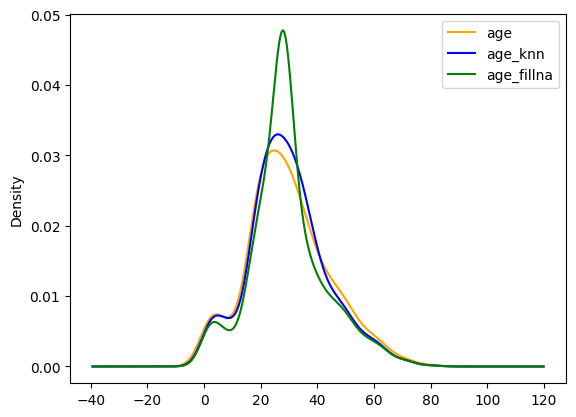

14.53 13.71


In [38]:
df_con.age.plot.kde(color='orange',label='age')
df_imputed.age.plot.kde(color='blue',label='age_knn')
df_con.age.fillna(value=df_con.age.median()).plot.kde(color='green',label='age_fillna')
plt.legend()
plt.show()
print(round(df_con.age.std(),2),round(df_imputed.age.std(),2))